<h1> A1 - Predicting Car Prices <h1>

Importing the libraries

In [252]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')


<h0>Loading data<h0>

In [253]:
# Load the dataset using pandas and storing them in a dataframe variable
df = pd.read_csv('Cars.csv')

In [254]:
# Displaying the first few rows of the dataframe
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [255]:
#Checking the statistical summary of the dataframe
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [256]:
#Checking the data types and non-null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [257]:
#Checking the number of rows and columns in the dataframe
df.shape

(8128, 13)

In [258]:
#Checking the column names in the dataframe
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [259]:
#Checking for unique values in "owner" column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

<h1> Task 1: Preparing the datasets <h1>

Changing the features 

In [260]:
#Mapping the owner column to numerical values.
ownermap = {                  
    "First Owner":1,
    "Second Owner":2, 
    "Third Owner":3, 
    "Fourth & Above Owner":4, 
    "Test Drive Car":5
    }    


In [261]:
#Checking if the owner column exists in the dataframe and then mapping it.
if 'owner' in df.columns:      
    df['owner'] = df['owner'].map(ownermap)

In [262]:
#Checking if mapping is done correctly
df.owner.unique() 

array([1, 2, 3, 4, 5])

<h1>Removing the rows of 'Fuel' column with values of LPG and CNG <h1> 

In [263]:
#Getting the count of unique values in the 'Fuel' column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [264]:
#Storing the unique values to remove in an array
fuel_to_remove = ['CNG', 'LPG']

In [265]:
#Removing the unwanted fuel types from the dataframe
df = df[~df['fuel'].isin(fuel_to_remove)]

In [266]:
#checking if the unwanted fuel types are removed
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

<h1> Removing "kmpl" and converting the column to numerical type for feature mileage<h1>

In [267]:
#Getting the values of mileage column
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [268]:
#Removing the "kmpl" from the mileage column
df['mileage']= df['mileage'].str.split( ).str[0]

In [269]:
#Converting the mileage column to float type
df['mileage'] = df['mileage'].astype(float)

In [270]:
#Checking if the conversation is done correctly
df['mileage'].dtype

dtype('float64')

<h1> Removing "CC" and converting the column to numerical type for feature engine<h1>

In [271]:
#Getting the values of 'engine' feature column
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [272]:
#Removing the 'CC' from the engine column using str.split() method
df['engine'] = df['engine'].str.split( ).str[0]

In [273]:
#Verifying the changes in the engine column
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [274]:
#converting the data type of engine column to float
df['engine'] = df['engine'].astype(float)

In [275]:
#verifying the data type of engine column
df['engine'].dtype

dtype('float64')

<h1> Removing "bhp" and converting the column to numerical type for feature max_power<h1>

In [276]:
#Getting the values of the column 'max_power'
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [277]:
#Removing the 'bhp' from the max_power column using str.split() method
df['max_power'] = df['max_power'].str.split( ).str[0]

In [278]:
#Converting the data type of max_power column to float
df['max_power'] = df['max_power'].astype(float)

In [279]:
#Verifying the changes
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [280]:
#Converting the mileage column to float type
df['mileage'] = df['mileage'].astype(float)

In [281]:
#Verifying the changes
df['engine'].dtypes

dtype('float64')

<h1> Taking only the first word for the feature brand<h1>

In [282]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [283]:
#Renaming the column 'name' to 'brand'
df.rename(columns={'name':'brand'}, inplace=True)
#checking the changes
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [284]:
#Getting information about the column 'brand'
df['brand'].head()

0          Maruti Swift Dzire VDI
1    Skoda Rapid 1.5 TDI Ambition
2        Honda City 2017-2020 EXi
3       Hyundai i20 Sportz Diesel
4          Maruti Swift VXI BSIII
Name: brand, dtype: object

In [285]:
#Only taking the first word from the brand column by using the str.split() method
df['brand'] = df['brand'].str.split( ).str[0]

In [286]:
#Verifying the changes
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

<h1>Dropping the feature torque<h1>

In [287]:
#Removing the feature 'torque' from the dataframe using the drop() method
df = df.drop(['torque'], axis=1)

<h1> Removing the 'Test Drive Cars' i.e. owner = 5 from the data set. <h1>

In [288]:
#Removing the 'Owner=5' from the dataframe using the query() method
df = df.query("owner != '5'")

In [289]:
#Verifying the changes on the owner column
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [290]:
#Checking the cleaned dataframe
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


<h1>Changing the columns 'brand', 'fuel, 'seller_type' and 'trasmission' to numerical format. <h1>

In [291]:
#Importing the LabelEncoder from sklearn library
from sklearn.preprocessing import LabelEncoder

#Initializing the LabelEncoder
label_encoder_brand = LabelEncoder()
label_encoder_fuel = LabelEncoder()
label_encoder_seller_type = LabelEncoder()
label_encoder_transmission = LabelEncoder()

#Transforming the categorical columns using the fit_transform() method
df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])      
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])


In [292]:
#Checking for the changes made
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [293]:
#Creating a csv of the encoded data set.
df.to_csv('le_cars_data.csv', sep = ',', index=False, encoding='utf-8 ')

<h1>Exploratory Data Analysis<h1>

In [294]:
#Seperating the numerical and categorical columns from the dataframe
#Excluding the column 'selling_price' from the numerical columns using df.loc method and storing in a variable 

df_copy = df.loc[:, df.columns != 'selling_price']

#Seperating the numerical and categorical columns from the dataframe

num_cols = df_copy.select_dtypes(include=['int64', 'float64'])
cat_cols = df_copy.select_dtypes(exclude=['int64', 'float64'])

In [295]:
#Verifying the changes made to the dataset
num_cols.columns, cat_cols.columns

(Index(['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
        'owner', 'mileage', 'engine', 'max_power', 'seats'],
       dtype='object'),
 Index([], dtype='object'))

<h1>Univariate Analysis<h1>

<h1>Distribution plot<h1>

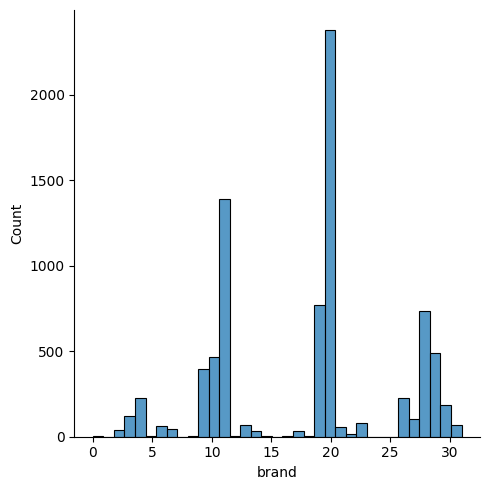

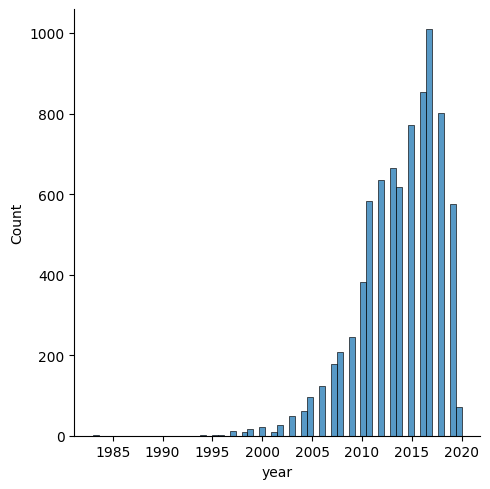

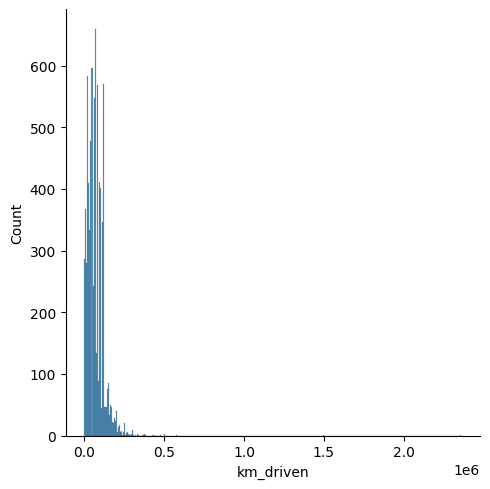

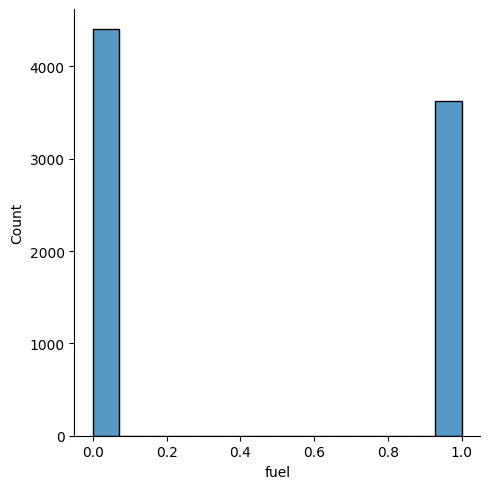

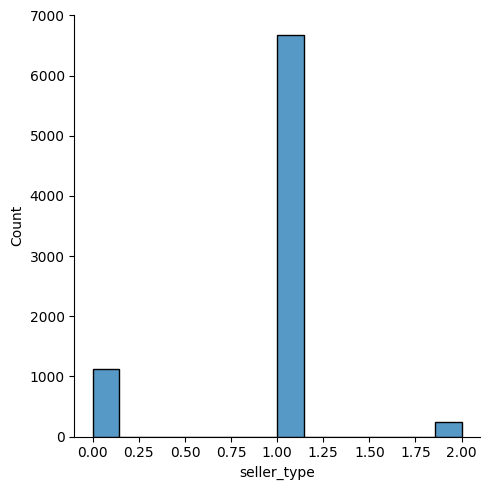

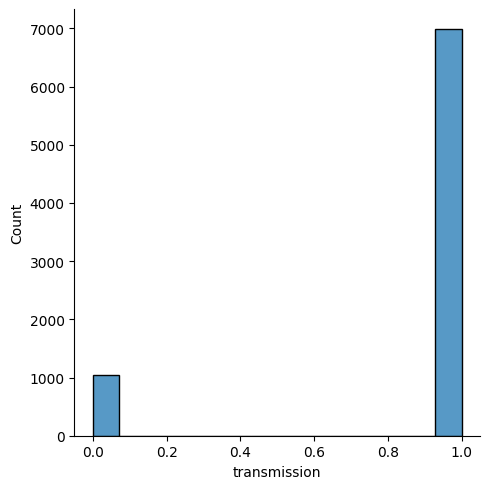

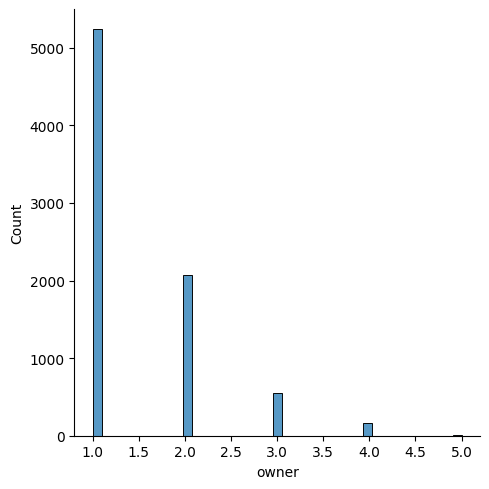

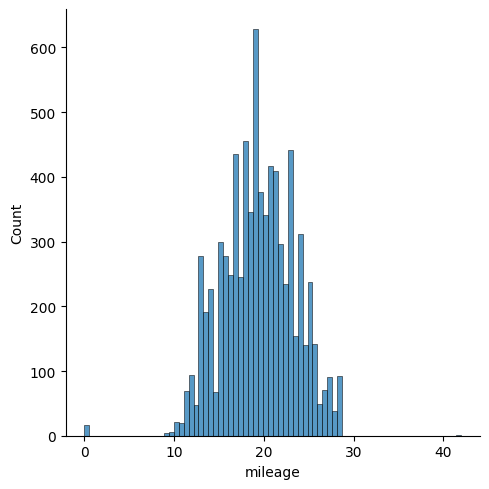

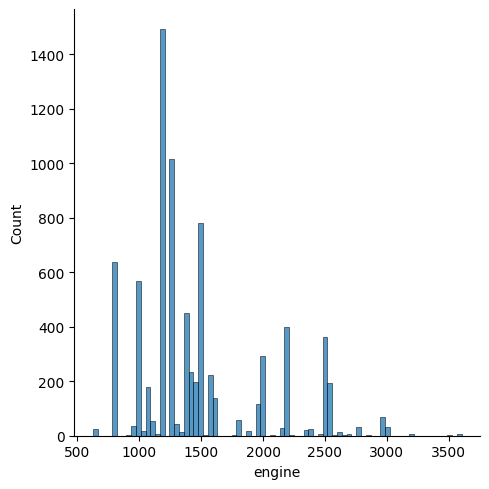

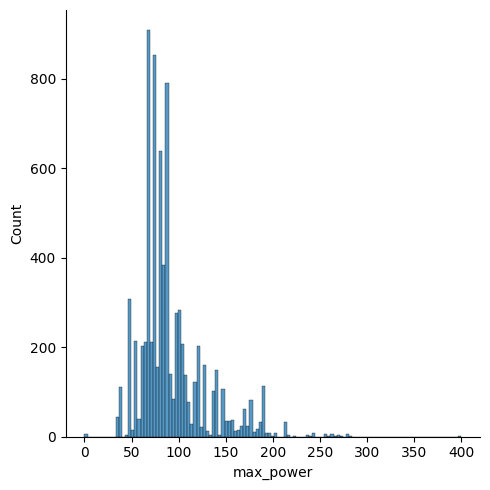

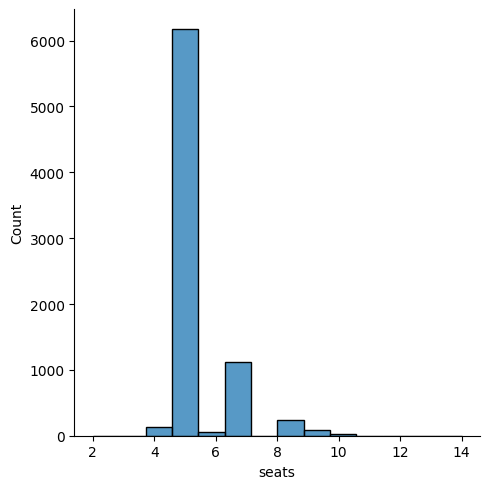

In [296]:
#Analysing the count of all nummerical colums using the distribution plot
for col in num_cols.columns:
    sns.displot(df, x=df[col])

<h1>Multivariate Analysis<h1>

<h1>Scatterplot<h1>

<Axes: xlabel='brand', ylabel='selling_price'>

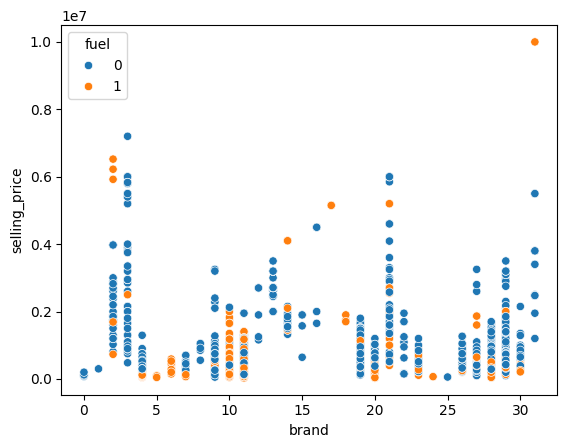

In [297]:
#Plotting the features in the scatter plot to see the relationship between the features and selling_price by keeping fuel as hue
sns.scatterplot(x=df['brand'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

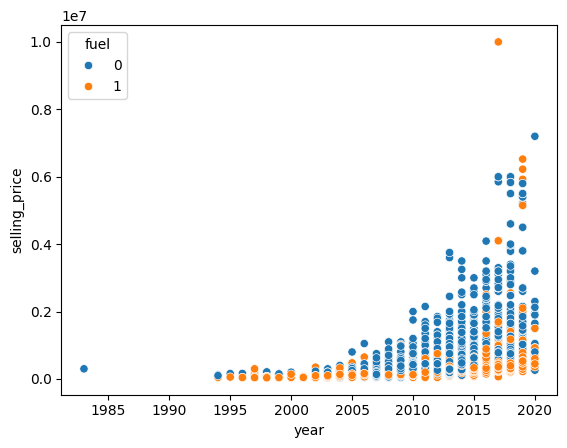

In [298]:
sns.scatterplot(x=df['year'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

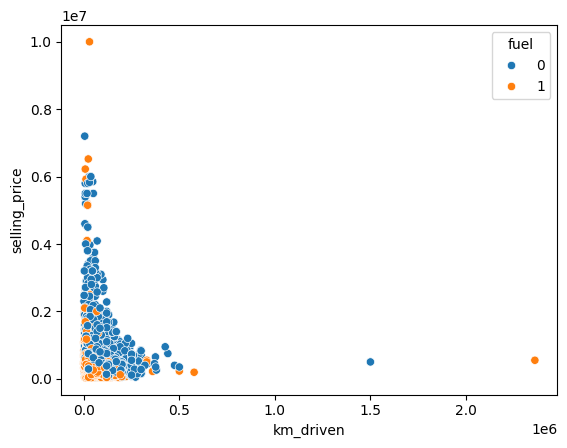

In [299]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='selling_price'>

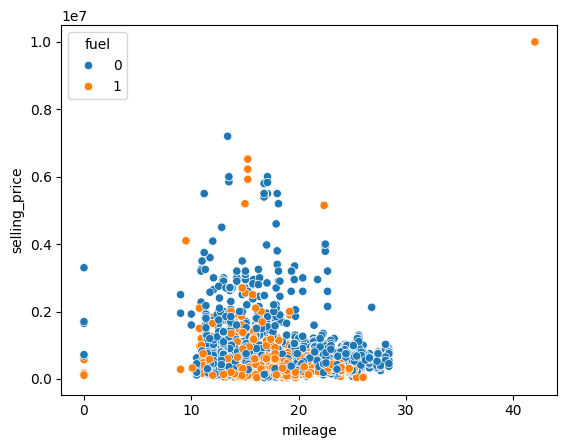

In [300]:
sns.scatterplot(x=df['mileage'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='selling_price'>

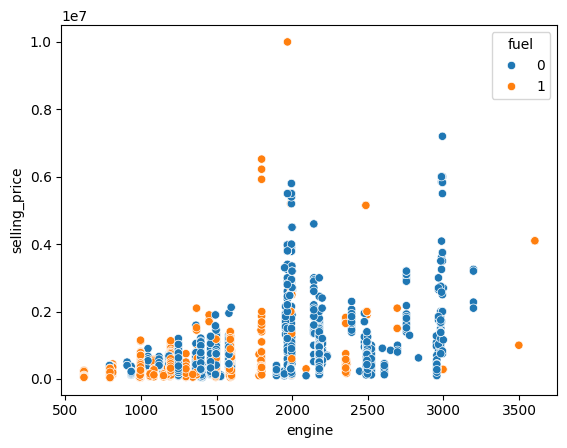

In [301]:
sns.scatterplot(x=df['engine'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='max_power', ylabel='selling_price'>

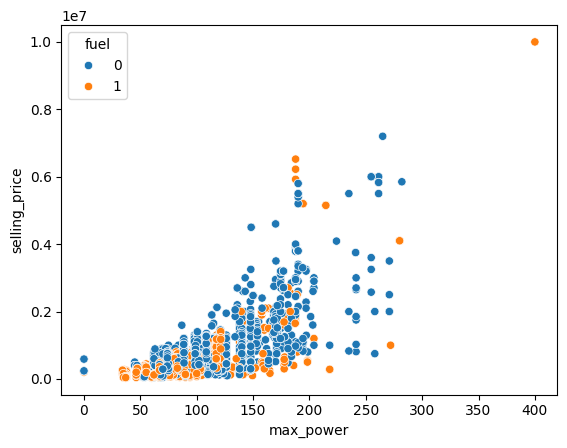

In [302]:
sns.scatterplot(x=df['max_power'], y=df['selling_price'], hue=df['fuel'])

<h1>Correlation matrix<h1>

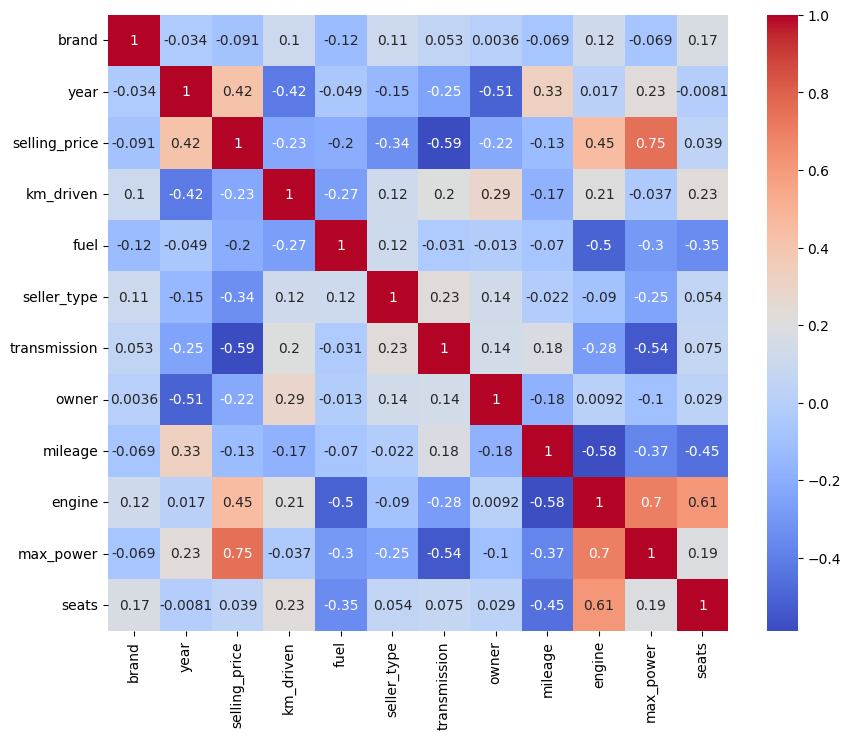

In [303]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<h1>Feature Selection<h1>

In [304]:
#The important features that were selected based on the correlation and ppscore matrix are stored in variable X

# Main features = max power, mileage, engine and brand

X = df[['max_power', 'mileage', 'year', 'brand']]

#Selling price is stored in variable Y, which is the target variable. Here, we have logarithmically transformed the selling_price column to ensure stability of prediction.
y = np.log(df['selling_price'])

<h1>Data Splitting<h1>

We are splitting the values into train set and test set. 

In [305]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into training and testing sets using train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

<h1>Preprocessing<h1>

Checking for null values in X_train 

In [306]:
#Checking for null values in the training and testing sets
X_train[['max_power', 'mileage', 'year', 'brand']].isnull().sum()

max_power    146
mileage      151
year           0
brand          0
dtype: int64

In [307]:
X_test[['max_power', 'mileage', 'year', 'brand']].isnull().sum()

max_power    62
mileage      63
year          0
brand         0
dtype: int64

In [308]:
#Checking for null values in y_train
y_train.isnull().sum()

np.int64(0)

In [309]:
#Checking for null values in y_train
y_test.isnull().sum()

np.int64(0)

<h1>Finding the mean, median, and mode of the features to fill up the null values<h1>

Here only max_power and mileage have null values among the features.

In [310]:
X_train['max_power'].median() #Finding the median of max_power because the distribution is right skewed and using mean to fill the null values will affect the distribution of the data.


np.float64(83.1)

In [311]:
X_train['mileage'].mean() #Finding the mean of mileage because the distribution is nearly normal and mean can be used to fill the null values.

np.float64(19.35297697368421)

In [312]:
X_test['max_power'].median()

np.float64(82.0)

In [313]:
X_test['mileage'].mean()

np.float64(19.47756710694504)

<h1>Filling the missing numerical values<h1>

Using the obtained median and mean of test and train dataset to fill in the null values. 

In [314]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)

In [315]:
#Verifying if the null values are filled in training set    
X_train[['max_power', 'mileage', 'brand', 'year']].isnull().sum()

max_power    0
mileage      0
brand        0
year         0
dtype: int64

In [316]:
#Verifying if the null values are filled in test set    
X_test[['max_power', 'mileage', 'brand', 'year']].isnull().sum()

max_power    0
mileage      0
brand        0
year         0
dtype: int64

In [317]:
#Verifying if the null values are filled in y_train and y_test
y_train.isnull().sum(), y_test.isnull().sum()

(np.int64(0), np.int64(0))

<h1>Checking for outliers<h1>

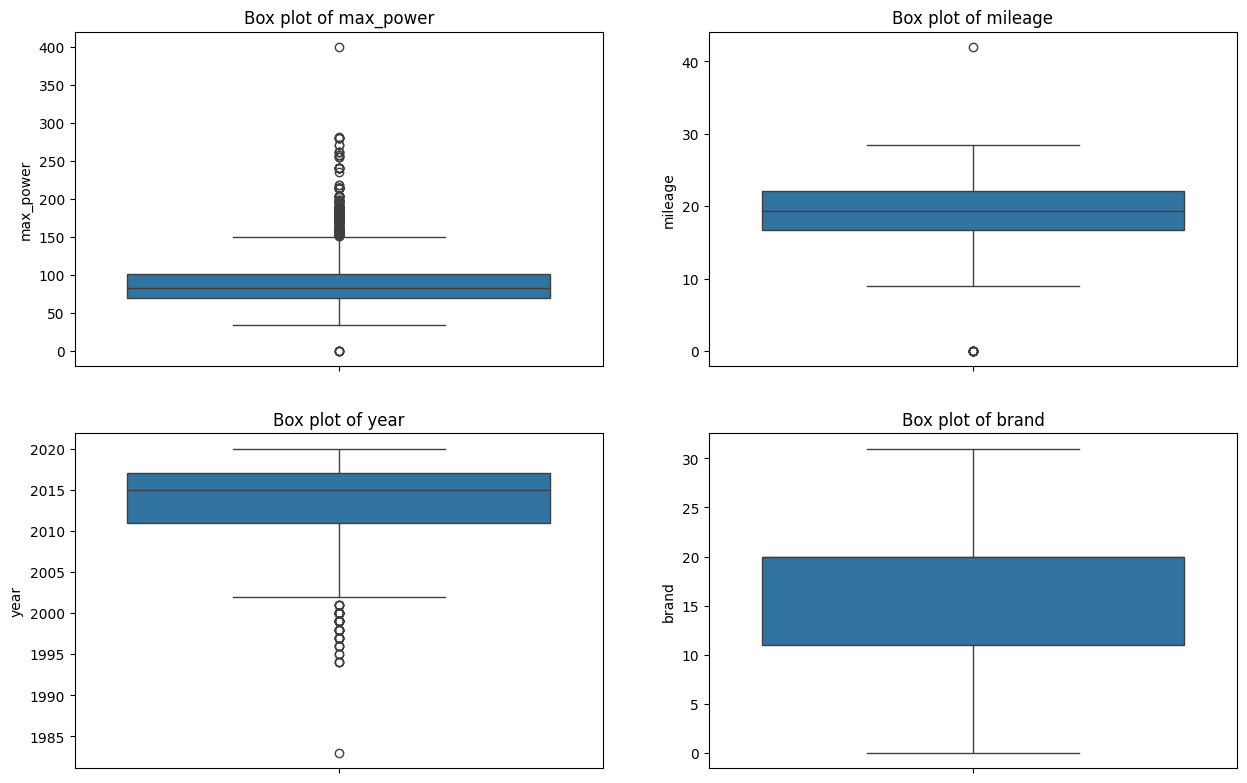

In [318]:
#Checking the outliers in the training set using box plot 
#Creating a dictionary to store the columns and their respective values

col_dict = {'max_power': 1, 'mileage': 2, 'year': 3, 'brand': 4}

#Using boxplot to visualize the outliers in the training set
plt.figure(figsize=(15,20))
for i, col in col_dict.items():
    plt.subplot(4,2,col)
    sns.boxplot(X_train[i])
    plt.title(f'Box plot of {i}')
plt.show()

In [319]:
#To check the impact of outliers on the efficiency of the model, we will define a function to calculate the outliers of each feature using the IQR method

def calculate_outliers(col, data=X_train):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75 - q25
    min_val = q25 - (1.5 * iqr)
    max_val = q75 + (1.5 * iqr)

    calculate_outliers = len(np.where((data[col] < min_val) | (data[col] > max_val))[0])
    percentage_outliers = round(calculate_outliers / len(data) * 100, 2)

    if calculate_outliers > 0:
        print(f'Feature {col} has {calculate_outliers} outliers which is {percentage_outliers}% of the data')
    else:
        print(f'Feature {col} has no outliers')

In [320]:
for col in X_train.columns:
    calculate_outliers(col)

Feature max_power has 412 outliers which is 7.33% of the data
Feature mileage has 13 outliers which is 0.23% of the data
Feature year has 55 outliers which is 0.98% of the data
Feature brand has no outliers


Since the percentage of the outliers are low in the dataset, we are neglecting them for analysis

<h1>Scaling the dataset<h1>

In [321]:
#Importing the library from sklearn for scaling the features, excluding the categorical features

from sklearn.preprocessing import MinMaxScaler
num_cols = ['max_power', 'mileage', 'year']
scaler = MinMaxScaler(feature_range=(0,1))
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [322]:
#Verifying the changes made
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5623, 4)
(2410, 4)
(5623,)
(2410,)


<h1>Modelling<h1>

In [323]:
#Using linear regression for the initial analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, yhat))
print('r2 score:', r2_score(y_test, yhat))

Mean Absolute Error: 0.2600134522445348
r2 score: 0.8368629406767405


<h1>Performing cross validation<h1>

In [324]:
#Importing the libraries for performing cross validation
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor(n_estimators=100, random_state=0), DecisionTreeRegressor(random_state=0), KNeighborsRegressor()]

algorithm_names = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'K-Neighbors Regressor']

In [325]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.11614384 -0.11283224 -0.11423973 -0.12889383 -0.11506048]; Mean: -0.11743402396093253
Support Vector Regression - Score: [-0.44265135 -0.45649471 -0.41637057 -0.45742822 -0.45295309]; Mean: -0.4451795880202778
Random Forest Regressor - Score: [-0.05428484 -0.05687743 -0.05287038 -0.05131965 -0.04984296]; Mean: -0.05303905144755413
Decision Tree Regressor - Score: [-0.06062954 -0.06569345 -0.07345377 -0.06904684 -0.06617457]; Mean: -0.06699963274226577
K-Neighbors Regressor - Score: [-0.06277896 -0.06046433 -0.0569603  -0.05777461 -0.04977099]; Mean: -0.0575498380198866


<h1>Grid Search<h1>

According to cross validation, random forest regressor is the model with the highest efficiency. 

In [326]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

/Projects/Python-for-Machine-Learning/.python/cpython-3.13.6-linux-x86_64-gnu/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Projects/Python-for-Machine-Learning/.python/cpython-3.13.6-linux-x86_64-gnu/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Projects/Python-for-Machine-Learning/.python/cpython-3.13.6-linux-x86_64-gnu/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptoo

In [327]:
#Getting the best parameters and best negative mean squared error from the grid search
best_params = grid.best_params_
best_score = -grid.best_score_          #A '-' sign is added to ignore the negative sign from the scoring parameter

print("Best Parameters: ", best_params)
print("Best Mean Squared Error: ", best_score)

Best Parameters:  {'bootstrap': True, 'max_depth': None, 'n_estimators': 15}
Best Mean Squared Error:  0.05445130149419179


<h1>Testing<h1>

In [328]:
yhat = grid.predict(X_test) #Storing the predicted values in yhat variable
#Calculating the mean absolute error and r2 score of the model

print('Mean Absolute Error:', mean_absolute_error(y_test, yhat))
print('r2 score:', r2_score(y_test, yhat))

Mean Absolute Error: 0.15647022381321024
r2 score: 0.9245670318148385


<h1>Analysis: Feature Importance<h1>

Analyzing the importance of each feature with the help of a bar graph

In [329]:
rfr = grid.best_estimator_  #Storing the best estimator from the grid search in a variable
rfr.feature_importances_   #Getting the feature importances from the model

array([0.45354922, 0.03946125, 0.47516027, 0.03182926])

<BarContainer object of 4 artists>

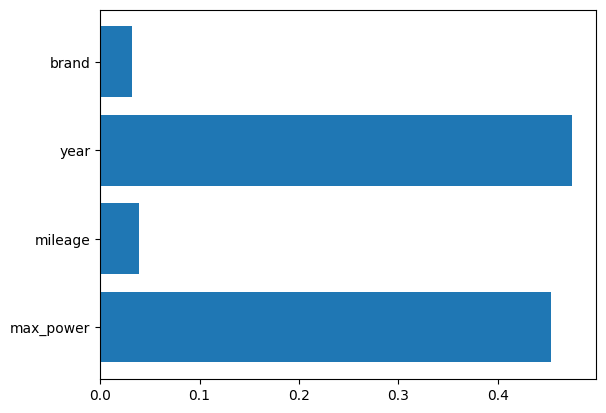

In [330]:
#Plotting the bar graph of the feature importances
plt.barh(X.columns, rfr.feature_importances_)

<h1>Inference<h1>

Checking the trained model with new and unseen data sets

In [331]:
import pickle

# save the model to disk
filename = 'model/car_prediction.model'
pickle.dump (grid, open(filename, 'wb'))
label_encoder_brand_path = 'model/brand-label.model'
pickle.dump(label_encoder_brand, open(label_encoder_brand_path, 'wb'))

scaler_path = 'model/prediction_scalar.model'
pickle.dump(scaler, open(scaler_path, 'wb'))

feature_importance_path = 'model/feature_importance.model;'
pickle.dump(rfr, open(feature_importance_path, 'wb'))



In [332]:
#Loading the model from the disk
loaded_model = pickle.load(open(filename, 'rb'))
scalar_model = pickle.load (open(scaler_path, 'rb'))
label_brand_model = pickle.load(open(label_encoder_brand_path, 'rb'))
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))


Working with an example

In [333]:
sample = df[['max_power', 'mileage', 'year', 'brand']].loc[1].to_frame().T
sample

,max_power,mileage,year,brand
1,103.52,21.14,2014.0,27.0


In [334]:
sample [num_cols]

,max_power,mileage,year
1,103.52,21.14,2014.0


In [335]:
sample [num_cols] = scalar_model.transform(sample[num_cols])
sample 

,max_power,mileage,year,brand
1,0.2588,0.503333,0.837838,27.0


In [336]:
predicted_selling_price = loaded_model.predict(sample)
print ("The predicted selling price is: ", str(np.exp(predicted_selling_price)))


The predicted selling price is:  [553113.39436598]


<h1> Report <h1>

The car prediction model is a basic machine learning model which predicts the price of a car based on the values of the features that the user has selected. 

The initial data set contained the features like: name(brand), year, km_driven, fuel, setter_type, trainsmission, owner, mileage, engine, max_power, torque, and seats. For the analysis we dropped and cleaned the data first for the analysis. We separated the string from the numerical values for the features fuel, mileage, engine, and maximum power. After performing the initial cleaning, an explanatory data analysis was performed to understand the nature of the features and their interdependency. A univariate analysis was performed using a distribution plot to observe the distribution of the data sets. Scatter plot was used to see the relationship between features and selling price. 

A correlation matrix was used to see the relation of the features with the selling price and select the most influential features. After analyzing the correlation matrix, maximum power, mileage, year, and brand were selected as important features for the analysis. After feature selection, the datasets were separated into train and test sets. About 30% of the dataset were separated into the test set. During the preprocessing step, median was used to fill the missing values of the maximum power and mean was used to fill the missing values of mileage. Our test set has no null values of the features that were selected.

<h1> Feature Selection<h1>

The features that were selected for analysis were as follows:

- Brand: The selling price of a car depends on the brand to some influential extent. The selling price of some luxury brands like BMW, Mercedes,etc. are higher than other brands. 

- Year of manufacture: It influences the selling price of the car because newly manufactured cars are sold for higher selling price than old price. 

- Maximum power: The cars with high power are priced higher due to their better performance and the use of higher level equipment. 

- Mileage: Cars which provide good mileage and better fuel efficiency can increase the demand of the product, and hence create a rise in its price. 

The other features like seats, seller type, and owner have lower influence than that of the selected features on the selling price. 


<h1> Algorithm <h1>

Random forest regressor model was used for training the model as the model naturally handles non-linear relationships, feature interactions and performs well against outliers. The model also requires minimal preprocessing as compared to other models (for example, we did not need to use one hot encoding for ‘brand’ features). 

The models which were not selected were:

- Linear regression: This model works the best when the relationship between the features is a straight line. Car prices don’t follow a straight line and features affect each other, so it misses important patterns.

- Single Decision Tree
Easy to understand but tends to memorize the training data and make unsteady predictions. A Random Forest fixes this by averaging many trees.

- KNN Regression
Predicts by averaging “nearby” examples. It’s sensitive to how data is scaled, slows down at prediction time, and struggles when data is less.

Hence, for a regression task like this the Random Forest Regressor has been selected.


<h1> Conclusions <h1>

Thus, the important features that were selected for the analysis were ‘max_power, ‘year’, ‘brand’, and ‘mileage’. Random Forest Regressor was used due to its better predictive performance. 
